In [2]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [14]:
#load the dataset and extact independent and dependent variables
companies = pd.read_csv(r"Data./1000_Companies.csv")
x = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

companies = pd.read_csv(r"Data./1000_Companies.csv"):

This line reads a CSV (Comma-Separated Values) file named "1000_Companies.csv" located in the "Data" directory.
It uses the pd.read_csv function from the pandas library to read the CSV file and store the data in a DataFrame called companies.
x = companies.iloc[:, :-1].values:

This line extracts the feature variables from the DataFrame companies and stores them in the variable x.
iloc is a method used for integer-location based indexing, and [:, :-1] is a slicing operation that selects all rows and all columns except the last one.
The .values attribute converts the selected data into a NumPy array, which is a common format for input data in machine learning.
y = companies.iloc[:, 4].values:

This line extracts the target variable from the DataFrame companies and stores it in the variable y.
iloc[:, 4] selects all rows from the 5th column (index 4) of the DataFrame.
The .values attribute converts the selected column into a NumPy array.
In summary, this code reads a CSV file containing data about 1000 companies, separates the feature variables (in x) from the target variable (in y), and converts them into NumPy arrays for further use, possibly in machine learning models or data analysis.

In [15]:
companies.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [18]:
print(x)


[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 ...
 [100275.47 241926.31 227142.82 'California']
 [128456.23 321652.14 281692.32 'California']
 [161181.72 270939.86 295442.17 'New York']]


In [19]:
print(y)

[192261.83    191792.06    191050.39    182901.99    166187.94
 156991.12    156122.51    155752.6     152211.77    149759.96
 146121.95    144259.4     141585.52    134307.35    132602.65
 129917.04    126992.93    125370.37    124266.9     122776.86
 118474.03    111313.02    110352.25    108733.99    108552.04
 107404.34    105733.54    105008.31    103282.38    101004.64
  99937.59     97483.56     97427.84     96778.92     96712.8
  96479.51     90708.19     89949.14     81229.06     81005.76
  78239.91     77798.83     71498.49     69758.98     65200.33
  64926.08     49490.75     42559.73     35673.41     14681.4
 123485.2464   82155.48418 125867.0108  104976.1696   89803.10053
  75297.23305 114284.5283  171985.0761   72337.96774 169566.5772
 158670.9451  114522.8756   85842.60573 101106.2297   59328.81874
 157142.6178   68669.64059 177717.3712   94409.4396  183945.1553
  82484.38635 144515.3371  105333.2634  122331.0988  168459.4156
  60947.70089 162733.9549  181574.4968   7357

The error occurred because the sns.heatmap function expects numerical data for computing correlations, and it encountered a non-numeric column in your DataFrame. In the provided example, the error message indicates that the non-numeric column is the 'State' column, which likely contains string (categorical) values like 'New York', 'California', etc.

The correlation coefficient is a measure of the linear relationship between two numerical variables. It ranges from -1 to 1, where 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.

Since 'State' is a categorical variable (containing strings), it cannot be used to calculate correlations with other numeric columns. When the sns.heatmap function attempted to convert the entire DataFrame to a numpy array (which requires numeric values), it encountered the string values in the 'State' column and raised a ValueError because it couldn't convert those strings to float.

To resolve this issue, it's necessary to exclude non-numeric columns from the correlation calculation, as shown in the previous example, where select_dtypes is used to select only the numeric columns for building the correlation matrix. This ensures that only the numeric data is used in the heatmap, and non-numeric columns are not included in the correlation computation.

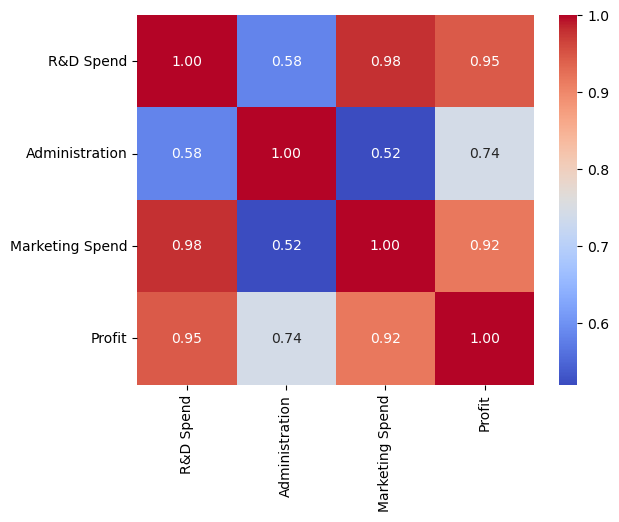

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'State' is a non-numeric column causing the issue
# You need to handle or remove non-numeric columns before using sns.heatmap
numeric_columns = companies.select_dtypes(include=['float64', 'int64'])

# Building the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


"In the heatmap above, the correlation matrix reveals the relationships between different numerical columns. Notably, the 'R&D Spend' column demonstrates a strong positive correlation of approximately 95% with the 'Profit' column. This indicates that R&D spending has a substantial impact on profit, suggesting that it is a crucial factor for predicting profit in the dataset."

In [25]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])

onehotencoder = OneHotEncoder(categorical_features = [3])
x = onehotencoder.fit_transform(x).toarray()
print(x)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'categorical_features'

In this updated code:

The OneHotEncoder is still used, but it's now applied through the ColumnTransformer.
The categorical_features parameter is not used anymore.
remainder='passthrough' is set in the ColumnTransformer to keep the non-transformed columns in the result.
This should resolve the error you encountered. Please replace X with your actual feature mat

In [26]:
# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Assuming X is your feature matrix
# Assuming column index 3 contains categorical data (State)

# Create a LabelEncoder object for encoding the categorical column
labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])

# Create a ColumnTransformer to apply OneHotEncoder to the specific column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = ct.fit_transform(x)

print(x)


[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 ...
 [1.0 0.0 0.0 100275.47 241926.31 227142.82]
 [1.0 0.0 0.0 128456.23 321652.14 281692.32]
 [0.0 0.0 1.0 161181.72 270939.86 295442.17]]


The purpose of label encoding is to convert categorical data into numerical format. In the context of 'State' values, label encoding might assign each unique state a unique numerical label. For example, 'New York' might become 0, 'California' might become 1, and 'Florida' might become 2.
The fit_transform method is a convenience method in scikit-learn that combines the steps of fitting the encoder to the data and transforming the data. It learns the mapping from categories to numerical labels (fitting) and then applies that mapping to the actual data (transforming).
So, after executing these two lines, the 'State' column in your feature matrix X will be replaced with numerical labels obtained through label encoding. This numerical representation can be useful for machine learning algorithms that require numerical input.

Import Libraries:

from sklearn.compose import ColumnTransformer: This imports the ColumnTransformer class from scikit-learn, which allows you to apply different transformers to different columns.
from sklearn.preprocessing import OneHotEncoder, LabelEncoder: This imports the OneHotEncoder and LabelEncoder classes from scikit-learn, which are used for one-hot encoding and label encoding, respectively.
Label Encoding:

labelencoder = LabelEncoder(): Creates an instance of the LabelEncoder class.
X[:, 3] = labelencoder.fit_transform(X[:, 3]): Applies label encoding to the categorical data in the 4th column (index 3) of the feature matrix X. Label encoding converts categorical values (like 'New York', 'California', etc.) into numerical labels.


One-Hot Encoding:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough'): Creates a ColumnTransformer that applies the OneHotEncoder to the 4th column (index 3) and keeps the non-transformed columns (remainder).
X = ct.fit_transform(X): Applies the transformations specified in the ColumnTransformer to the feature matrix X. The result is the one-hot encoded matrix where the categorical column is replaced with multiple columns, each representing a category.
In summary, this code performs both label encoding and one-hot encoding on the categorical data in the feature matrix X. The label encoding is applied first to convert categorical values into numerical labels, and then the one-hot encoding is applied to represent each category with binary columns. This is a common preprocessing step in machine learning when dealing with categorical data.

One-Hot Encoding is a method used to represent categorical data as binary vectors. In this encoding scheme, each category is mapped to a binary value, and all the values are mutually exclusive. Specifically, for each category, a new binary column (also known as a "dummy" or "indicator" variable) is created. These columns are often referred to as one-hot encoded columns.

Here's how One-Hot Encoding works:

Assigning Integer Labels:

Before applying One-Hot Encoding, categorical data is usually label encoded. This means assigning a unique integer label to each category. For example, if you have three categories 'Red,' 'Green,' and 'Blue,' you might label encode them as 0, 1, and 2, respectively.
Creating Binary Columns:

For each unique label, a new binary column is created.
If there are n unique labels, then you create n binary columns.
Each binary column represents whether the data point belongs to a specific category. The presence of a 1 in a column indicates that the data point is in that category, and 0 indicates it is not.
Example:

Consider a 'Color' column with label-encoded values: 'Red' (0), 'Green' (1), 'Blue' (2).
After One-Hot Encoding, you create three binary columns: 'Color_Red,' 'Color_Green,' and 'Color_Blue.'
If a data point originally had the label 'Red,' the 'Color_Red' column would have a 1, and 'Color_Green' and 'Color_Blue' would have 0s.
Advantages:

One-Hot Encoding is particularly useful when dealing with categorical data in machine learning models.
It prevents the model from assigning ordinal relationships between categories that don't actually exist (e.g., assuming 'Red' is greater than 'Green').
Scikit-Learn Implementation:

In Python, scikit-learn provides the OneHotEncoder class for performing One-Hot Encoding. The fit_transform method of this class is typically used for transforming categorical data.
Here's a brief example in Python:

In [27]:
x = x[:, 1:]

#Splitting the data set into the traning set and Test test 

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2,random_state=0)

Importing the Necessary Module:

from sklearn.model_selection import train_test_split: This line imports the train_test_split function from scikit-learn's model_selection module.
Splitting the Dataset:

x_train, x_test, y_train, y_test: These variables represent the resulting training and testing sets for both the features (x) and the target variable (y).
Arguments of train_test_split Function:

x and y: The feature matrix (x) and the target variable (y) that you want to split into training and testing sets.
test_size=0.2: This parameter specifies the proportion of the dataset to include in the test split. In this case, it's set to 20%, meaning 80% of the data will be used for training, and 20% for testing.
random_state=0: This parameter provides a seed for the random number generator used during the split. Setting it to a specific value (in this case, 0) ensures reproducibility. The same seed will result in the same split every time you run the code.
Resulting Sets:

x_train: The training set of features.
x_test: The testing set of features.
y_train: The training set of target values.
y_test: The testing set of target values.
Use in Machine Learning Workflow:

Typically, you use the training set (x_train and y_train) to train your machine learning model. Once the model is trained, you use the testing set (x_test and y_test) to evaluate its performance on unseen data.
Here's a simplified summary of how these sets are used in a machine learning workflow:

Training: Train your model using x_train and y_train.
Testing/Evaluation: Evaluate the model's performance on unseen data using x_test and y_test.

In [29]:
#fitting multiple linear regression to the traning set 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [30]:
#predicy the test set result 
y_pred = regressor.predict(x_test)
print(y_pred)

[ 89790.61532915  88427.07187361  94894.67836971 175680.86725611
  83411.73042088 110571.90200074 132145.2293644   91473.37719686
 164597.05380607  53222.826674    66950.19050989 150566.43987005
 126915.20858596  59337.85971049 177513.91053062  75316.2814305
 118248.14406603 164574.40699903 170937.2898107  182069.11645085
 118845.03252688  85669.95112228 180992.59396144  84145.08220144
 105005.83769214 101233.56772746  53831.0766909   56881.41475223
  68896.39346904 210040.00765885 120778.72270894 111724.87157654
 101487.90541517 137959.02649624  63969.95996742 108857.91214126
 186014.72531989 171442.64130748 174644.26529205 117671.49128195
  96731.37857433 165452.2577941  107724.34331255  50194.54176912
 116513.89532179  58632.4898682  158416.4682761   78541.48521609
 159727.66671744 131137.87699644 184880.70924517 174609.08266881
  93745.66352058  78341.13383417 180745.90439081  84461.61490552
 142900.90602903 170618.44098397  84365.09530838 105307.3716218
 141660.07290787  52527.343

In [31]:
print(regressor.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


Yes, you're correct. In the context of linear regression, the regressor.coef_ attribute returns the coefficients (slopes) associated with each feature in the linear equation.

In a simple linear regression with one independent variable, the linear equation is of the form:

In [32]:
print(regressor.intercept_)

-51035.229724035366


In the context of linear regression, the regressor.intercept_ attribute represents the y-intercept of the linear equation. The y-intercept is the point where the regression line intersects the y-axis when all independent variables are set to zero.

The linear regression equation for a simple linear regression (with one independent variable) is given by:

In [34]:
#calculate the  R squre value
# Corrected import statement
from sklearn.metrics import r2_score

# Assuming y_test and y_pred are already defined
r2_score_value = r2_score(y_test, y_pred)

print(r2_score_value)


0.91126958922688
